In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [84]:
class Bandit(object):
    def __init__(self, m):
        self.m = m
        self.mean = 0
        self.N = 0
        
    def pull(self):
        return np.random.randn() + self.m
    def update(self, x):
        self.N += 1
        self.mean = (1- 1.0/self.N)* self.mean + 1.0/self.N * x
        
        
def run_experiment_epsilon_greedy(m1 ,m2, m3, eps, N):
    bandits = [Bandit(m1), Bandit(m2), Bandit(m3)]
    data = np.empty(N)
    for i in range(N):
        p = np.random.random()
        if p < eps:
            j = np.random.choice(3)
        else:
            j = np.argmax([b.mean for b in bandits])
        x = bandits[j].pull()
        bandits[j].update(x)
            
        data[i] = x
    cumulative_average = np.cumsum(data)/(np.arange(N) + 1)
    
    
    plt.plot(cumulative_average)
    plt.plot(np.ones(N) * m1)
    plt.plot(np.ones(N) * m2)
    plt.plot(np.ones(N) * m3)
    plt.xscale('log')
    plt.show()
    
    
    for b in bandits:
        print(b.mean)
        
    return cumulative_average




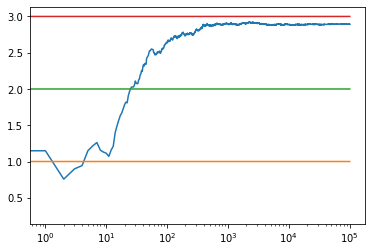

0.989988302801772
1.961595902924998
2.995390614535708


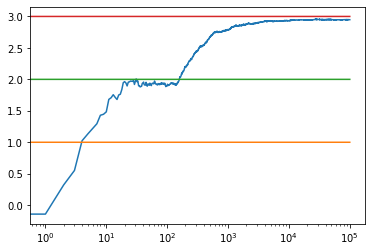

1.0091043706726053
2.0305860986018844
2.9984474265770964


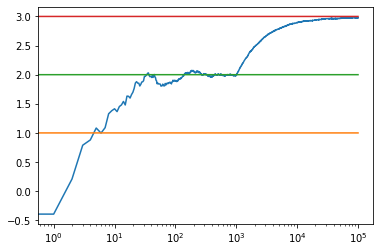

1.0335953457734373
2.0070150888324156
2.9973797863444327


In [85]:
c1eg= run_experiment_epsilon_greedy(1.0 , 2.0, 3.0, 0.1, 100000)
c2eg= run_experiment_epsilon_greedy(1.0 , 2.0, 3.0, 0.05, 100000)
c3eg= run_experiment_epsilon_greedy(1.0 , 2.0, 3.0, 0.01, 100000)

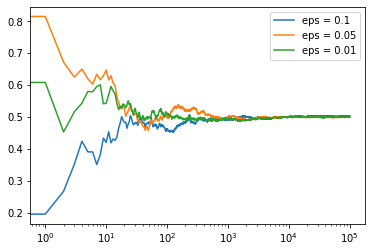

In [17]:
#log scale plot
plt.plot(c1eg, label="eps = 0.1")
plt.plot(c2eg, label="eps = 0.05")
plt.plot(c3eg, label="eps = 0.01")
plt.legend(loc = "best")
plt.xscale('log')
plt.show()

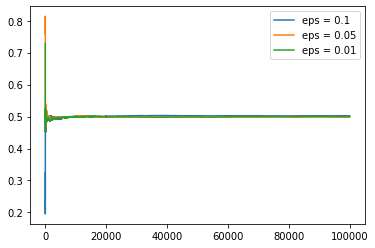

In [19]:
#linear scale plot
plt.plot(c1eg, label="eps = 0.1")
plt.plot(c2eg, label="eps = 0.05")
plt.plot(c3eg, label="eps = 0.01")
plt.legend(loc="best")
plt.show()

In [88]:
class BanditOIV(object):
    def __init__(self, m, upper_limit):
        self.m = m
        self.mean = upper_limit
        self.N = 1
        
    def pull(self):
        return np.random.randn() + self.m
    def update(self, x):
        self.N += 1
        self.mean = (1- 1.0/self.N)* self.mean + 1.0/self.N * x

def run_experiment_optimistic_initial_value(m1 ,m2, m3, l1, l2, l3, N):
    bandits = [BanditOIV(m1, l1), BanditOIV(m2, l2), BanditOIV(m3, l3)]
    data = np.empty(N)
    for i in range(N):
        j = np.argmax([b.mean for b in bandits])
        x = bandits[j].pull()
        bandits[j].update(x)
            
        data[i] = x
    cumulative_average = np.cumsum(data)/(np.arange(N) + 1)
    
    
    plt.plot(cumulative_average)
    plt.plot(np.ones(N) * m1)
    plt.plot(np.ones(N) * m2)
    plt.plot(np.ones(N) * m3)
    plt.xscale('log')
    plt.show()
    
    
    for b in bandits:
        print(b.mean)
        
    return cumulative_average




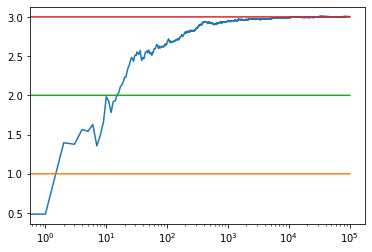

2.456190097728939
2.713344161339786
3.004541961267607


In [122]:
c1OIV= run_experiment_optimistic_initial_value(1 ,2, 3, 10, 10, 10, 100000)

In [90]:
def run_experiment_UCB(m1 ,m2, m3, N):
    bandits = [Bandit(m1), Bandit(m2), Bandit(m3)]
    data = np.empty(N)
    for i in range(N):
        j = np.argmax([b.mean + np.sqrt(2*np.log(i+1)/(b.N+1e-10)) for b in bandits])
        x = bandits[j].pull()
        bandits[j].update(x)
            
        data[i] = x
    cumulative_average = np.cumsum(data)/(np.arange(N) + 1)
    
    
    plt.plot(cumulative_average)
    plt.plot(np.ones(N) * m1)
    plt.plot(np.ones(N) * m2)
    plt.plot(np.ones(N) * m3)
    plt.xscale('log')
    plt.show()
    
    
    for b in bandits:
        print(b.mean)
        
    return cumulative_average


In [111]:
class BanditBayesian(object):
    def __init__(self, m):
        self.m = m
        # parameters for mu - prior is N(0,1)
        self.m0 = 0
        self.lambda0 = 1
        self.sum_x = 0
        self.tau = 1
        
        
    def pull(self):
        return np.random.randn() + self.m
    
    def sample(self):
        return np.random.randn() / np.sqrt(self.lambda0) + self.m0
    
    def update(self, x):
        # assume tau is 1
        lambda1 = self.lambda0 + 1
        self.sum_x += x
        self.m0 =  (self.tau * self.sum_x) / lambda1
        self.lambda0 = lambda1

def run_experiment_decaying_epsilon(m1 ,m2, m3, N):
    bandits = [Bandit(m1), Bandit(m2), Bandit(m3)]
    data = np.empty(N)
    for i in range(N):
        p = np.random.random()
        if p < 1.0/(i + 1.0):
            j = np.random.choice(3)
        else:
            j = np.argmax([b.mean for b in bandits])
        x = bandits[j].pull()
        bandits[j].update(x)
            
        data[i] = x
    cumulative_average = np.cumsum(data)/(np.arange(N) + 1)
    
    
    plt.plot(cumulative_average)
    plt.plot(np.ones(N) * m1)
    plt.plot(np.ones(N) * m2)
    plt.plot(np.ones(N) * m3)
    plt.xscale('log')
    plt.show()
    
    
    for b in bandits:
        print(b.mean)
        
    return cumulative_average

def run_experiment_bayesian(m1 ,m2, m3, N):
    bandits = [BanditBayesian(m1), BanditBayesian(m2), BanditBayesian(m3)]
    data = np.empty(N)
    for i in range(N):
        j = np.argmax([b.sample() for b in bandits])
        x = bandits[j].pull()
        bandits[j].update(x)
            
        data[i] = x
    cumulative_average = np.cumsum(data)/(np.arange(N) + 1)
    
    
    plt.plot(cumulative_average)
    plt.plot(np.ones(N) * m1)
    plt.plot(np.ones(N) * m2)
    plt.plot(np.ones(N) * m3)
    plt.xscale('log')
    plt.show()
    
    
    for b in bandits:
        print(b.m0)
        
    return cumulative_average

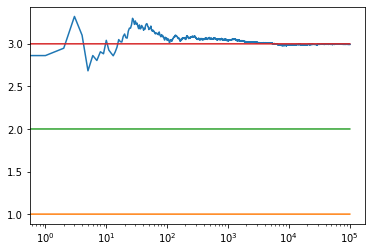

1.4319811747738602
2.5465683495911806
2.9936505727002336


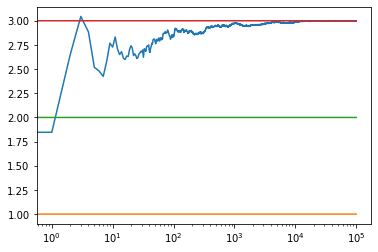

0.7847649306323095
1.1799581724989925
2.998253273993657


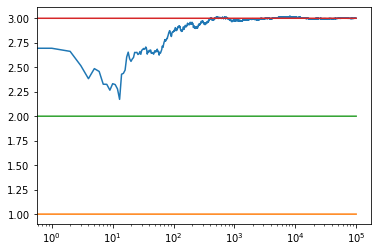

1.0864826958220253
2.003719635796743
3.001784251601152


In [114]:
c1egdecay= run_experiment_decaying_epsilon(1.0 , 2.0, 3.0, 100000)
c1bayesian = run_experiment_bayesian(1.0, 2.0, 3.0, 100000)
c1UCB = run_experiment_UCB(1.0, 2.0, 3.0, 100000)

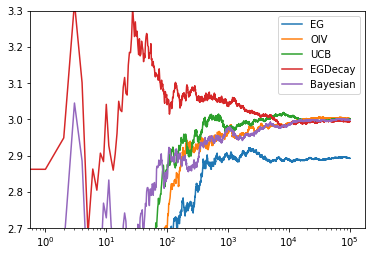

In [121]:
plt.plot(c1eg, label="EG")
plt.plot(c1OIV, label="OIV")
plt.plot(c1UCB, label="UCB")
plt.plot(c1egdecay, label="EGDecay")
plt.plot(c1bayesian, label="Bayesian")
plt.ylim([2.7,3.3])
plt.xscale('log')
plt.legend(loc="best")
plt.show()